In [1]:
import numpy as np
import os
import torch
import torch.nn.functional as F
from typing import List, Optional, Tuple, Union
from transformers import PreTrainedModel, AutoModelForSequenceClassification, T5ForConditionalGeneration
from transformers import AutoTokenizer
import datasets

import math
from matplotlib import pyplot as plt


from typing import List, Optional, Tuple, Union
from transformers import BertForSequenceClassification
import transformers
from transformers.modeling_outputs import SequenceClassifierOutput

### Finetune

In [2]:
from transformers import AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
import sys
sys.path.append('..')
from modeling_rmt import RMTEncoderForSequenceClassification
# from modeling_rmt_enc_dec import RMTEncoderDecoderForConditionalGeneration

In [3]:
num_segments = 6
num_mem_tokens = 10
# device = torch.device(3)
device = 'cpu'

In [4]:
model_name = 'bert-base-cased'

tokenizer = AutoTokenizer.from_pretrained(model_name)

rmt_config = {'num_mem_tokens': num_mem_tokens, 
                'max_n_segments': num_segments,
                'tokenizer': tokenizer,
               #  'memory_layers': 'all', 
               #  'share_memory_layers': True,
               #  'reconstruction_loss_coef': 0.1,
               #  'separate_memory_classifier': True,
               #  'memory_aggregation': 'avg',
               #  'memory_task_loss_coef': 1e-2,
                'segment_ordering': 'regular',
                'input_size': 512, 
                'bptt_depth': -1, 
                'sum_loss': False,
             }

base_model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3).to(device)
rmt = RMTEncoderForSequenceClassification(base_model, **rmt_config).to(device)
# rmt = RMTEncoderCPUOffload(base_model, **rmt_config)

/cephfs/home/bulatov/bulatov/hvdenv/lib/python3.8/site-packages/cryptography/hazmat/backends/openssl/x509.py:14: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  warnings.warn(
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from 

In [7]:
cpt = torch.load('../../runs/curriculum/contract_nli/bert-base-cased/lr1e-05_linear_adamw_wd1e-03_2994-512-{6}seg_mem10_bs32_iters8000_regular_sum_loss_from_cpt_5-6/run_1/model_best.pth', map_location='cpu')
rmt.load_state_dict(cpt['model_state_dict'])

<All keys matched successfully>

In [31]:
out = rmt(sample_input_ids, **kwargs, output_hidden_states=False, output_attentions=False)
out.keys()

odict_keys(['loss', 'logits', 'hidden_states', 'loss_0', 'loss_1', 'loss_2'])

In [36]:
[(k, out[k]) for k in out if 'loss' in k]

[('loss', tensor(1.0148, grad_fn=<NllLossBackward>)),
 ('loss_0', tensor(1.3241, grad_fn=<NllLossBackward>)),
 ('loss_1', tensor(1.5897, grad_fn=<NllLossBackward>)),
 ('loss_2', tensor(1.0148, grad_fn=<NllLossBackward>))]

In [55]:
gen = iter(valid_dataloader)

In [56]:
sample = next(gen)

if 'id' in sample:
    id = sample.pop('id')
if 'target_text' in sample:
    tgt_text = sample.pop('target_text')

# rmt.to(device)
for k in sample:
    sample[k] = sample[k].to(device)
    
sample_input_ids = sample.pop('input_ids').to(device)
kwargs = sample

out = rmt(sample_input_ids, **kwargs, output_hidden_states=False, output_attentions=False)
[(k, out[k]) for k in out if 'loss' in k]

[('loss', tensor(0.2106, grad_fn=<NllLossBackward>)),
 ('loss_0', tensor(0.6295, grad_fn=<NllLossBackward>)),
 ('loss_1', tensor(0.4058, grad_fn=<NllLossBackward>)),
 ('loss_2', tensor(0.2319, grad_fn=<NllLossBackward>)),
 ('loss_3', tensor(0.1637, grad_fn=<NllLossBackward>)),
 ('loss_4', tensor(0.1651, grad_fn=<NllLossBackward>)),
 ('loss_5', tensor(0.2106, grad_fn=<NllLossBackward>))]

In [ ]:
sample = next(gen)

if 'id' in sample:
    id = sample.pop('id')
if 'target_text' in sample:
    tgt_text = sample.pop('target_text')

# rmt.to(device)
for k in sample:
    sample[k] = sample[k].to(device)
    
sample_input_ids = sample.pop('input_ids').to(device)
kwargs = sample

out = rmt(sample_input_ids, **kwargs, output_hidden_states=False, output_attentions=False)
[(k, out[k]) for k in out if 'loss' in k]

[('loss', tensor(1.1045, grad_fn=<NllLossBackward>)),
 ('loss_0', tensor(1.9142, grad_fn=<NllLossBackward>)),
 ('loss_1', tensor(1.2701, grad_fn=<NllLossBackward>)),
 ('loss_2', tensor(2.6680, grad_fn=<NllLossBackward>)),
 ('loss_3', tensor(2.3840, grad_fn=<NllLossBackward>)),
 ('loss_4', tensor(1.1045, grad_fn=<NllLossBackward>))]

In [40]:
sample = next(gen)

if 'id' in sample:
    id = sample.pop('id')
if 'target_text' in sample:
    tgt_text = sample.pop('target_text')

# rmt.to(device)
for k in sample:
    sample[k] = sample[k].to(device)
    
sample_input_ids = sample.pop('input_ids').to(device)
kwargs = sample

out = rmt(sample_input_ids, **kwargs, output_hidden_states=False, output_attentions=False)
[(k, out[k]) for k in out if 'loss' in k]

[('loss', tensor(0.1997, grad_fn=<NllLossBackward>)),
 ('loss_0', tensor(0.2862, grad_fn=<NllLossBackward>)),
 ('loss_1', tensor(0.4708, grad_fn=<NllLossBackward>)),
 ('loss_2', tensor(0.4086, grad_fn=<NllLossBackward>)),
 ('loss_3', tensor(0.2547, grad_fn=<NllLossBackward>)),
 ('loss_4', tensor(0.2181, grad_fn=<NllLossBackward>)),
 ('loss_5', tensor(0.1997, grad_fn=<NllLossBackward>))]

In [41]:
sample = next(gen)

if 'id' in sample:
    id = sample.pop('id')
if 'target_text' in sample:
    tgt_text = sample.pop('target_text')

# rmt.to(device)
for k in sample:
    sample[k] = sample[k].to(device)
    
sample_input_ids = sample.pop('input_ids').to(device)
kwargs = sample

out = rmt(sample_input_ids, **kwargs, output_hidden_states=False, output_attentions=False)
[(k, out[k]) for k in out if 'loss' in k]

[('loss', tensor(0.2881, grad_fn=<NllLossBackward>)),
 ('loss_0', tensor(0.2883, grad_fn=<NllLossBackward>)),
 ('loss_1', tensor(0.2028, grad_fn=<NllLossBackward>)),
 ('loss_2', tensor(0.1835, grad_fn=<NllLossBackward>)),
 ('loss_3', tensor(0.1985, grad_fn=<NllLossBackward>)),
 ('loss_4', tensor(0.2881, grad_fn=<NllLossBackward>))]

In [42]:
sample = next(gen)

if 'id' in sample:
    id = sample.pop('id')
if 'target_text' in sample:
    tgt_text = sample.pop('target_text')

# rmt.to(device)
for k in sample:
    sample[k] = sample[k].to(device)
    
sample_input_ids = sample.pop('input_ids').to(device)
kwargs = sample

out = rmt(sample_input_ids, **kwargs, output_hidden_states=False, output_attentions=False)
[(k, out[k]) for k in out if 'loss' in k]

[('loss', tensor(0.1461, grad_fn=<NllLossBackward>)),
 ('loss_0', tensor(0.2555, grad_fn=<NllLossBackward>)),
 ('loss_1', tensor(0.1634, grad_fn=<NllLossBackward>)),
 ('loss_2', tensor(0.1461, grad_fn=<NllLossBackward>))]

In [44]:
sample = next(gen)

if 'id' in sample:
    id = sample.pop('id')
if 'target_text' in sample:
    tgt_text = sample.pop('target_text')

# rmt.to(device)
for k in sample:
    sample[k] = sample[k].to(device)
    
sample_input_ids = sample.pop('input_ids').to(device)
kwargs = sample

out = rmt(sample_input_ids, **kwargs, output_hidden_states=True, output_attentions=False)
[(k, out[k]) for k in out if 'loss' in k]

[('loss', tensor(0.3367, grad_fn=<NllLossBackward>)),
 ('loss_0', tensor(0.6846, grad_fn=<NllLossBackward>)),
 ('loss_1', tensor(0.2950, grad_fn=<NllLossBackward>)),
 ('loss_2', tensor(0.8451, grad_fn=<NllLossBackward>)),
 ('loss_3', tensor(0.3367, grad_fn=<NllLossBackward>))]

In [77]:
sample = next(gen)
sample['input_ids'].shape
# sample

torch.Size([1, 2322])

In [48]:
out['hidden_states_0'][-1].shape

torch.Size([1, 512, 768])

In [45]:
kwargs['labels']

tensor([1, 2])

In [46]:
out.logits.argmax(dim=1)

tensor([1, 2])

In [ ]:
out.loss_0, out.loss_1, out.loss_2, out.loss_3, out.loss_4, out.loss

(tensor(0.6167, grad_fn=<NllLossBackward>),
 tensor(0.9928, grad_fn=<NllLossBackward>),
 tensor(1.4698, grad_fn=<NllLossBackward>),
 tensor(1.1471, grad_fn=<NllLossBackward>),
 tensor(1.3934, grad_fn=<NllLossBackward>),
 tensor(1.3934, grad_fn=<NllLossBackward>))

In [ ]:
out.loss_0, out.loss_1, out.loss_2, out.loss_3, out.loss_4, out.loss

(tensor(1.4808, grad_fn=<NllLossBackward>),
 tensor(1.4873, grad_fn=<NllLossBackward>),
 tensor(1.4421, grad_fn=<NllLossBackward>),
 tensor(1.3990, grad_fn=<NllLossBackward>),
 tensor(1.4740, grad_fn=<NllLossBackward>),
 tensor(1.4740, grad_fn=<NllLossBackward>))

### load dataset 

In [5]:
# class Holder:
#     def __init__(self):
#         pass

In [6]:
# input_seq_len = 2495
# target_seq_len = 512
# batch_size = 2

# args = Holder
# args.target_seq_len = target_seq_len
# args.input_seq_len = input_seq_len
# args.input_prefix = ''
# device = 'cpu'

### Encoder-decoder

In [5]:
# global_attention_first_token = False  # should be True for LED
# encode_plus_kwargs = {'truncation': True, 'padding': 'longest', 'pad_to_multiple_of': 1}
# # generate_kwargs = {'max_length': args.target_seq_len, 'min_length': args.target_seq_len}
# generate_kwargs = {}

# def collate_fn(batch):
#     # cut too long strings because they may slow down tokenization
#     inputs = [b['input'][:args.input_seq_len * 10] for b in batch]
#     if 'outputs' in batch[0]:
#         # if we have more than 1 label per example (only in valid) take only one of them
#         # to compute loss on valid
#         labels = [b['outputs'][0][:args.target_seq_len * 10] for b in batch]
#     else:
#         labels = [b['output'][:args.target_seq_len * 10] for b in batch]
#     if args.input_prefix:
#         inputs = [args.input_prefix + inp for inp in inputs]
#     features = tokenizer.batch_encode_plus(list(inputs), max_length=args.input_seq_len, return_tensors='pt',
#                                            **encode_plus_kwargs)
#     with tokenizer.as_target_tokenizer():
#         labels = tokenizer.batch_encode_plus(list(labels), max_length=args.target_seq_len, return_tensors='pt',
#                                              **encode_plus_kwargs).input_ids
#     labels[labels == tokenizer.pad_token_id] = -100
#     features['labels'] = labels
#     features['id'] = [b['id'] for b in batch]
#     if 'outputs' in batch[0]:
#         features['target_text'] = [b['outputs'] for b in batch]
#     else:
#         features['target_text'] = [b['output'] for b in batch]
#     if 'global_attention_mask' in features:
#         raise RuntimeError('What global attention mask for Longformer and LongformerEncoder-Decoder should be?')
#     return features

In [6]:
# task_name = 'qasper'
# dataset = datasets.load_dataset('tau/scrolls', task_name)
# train_dataset = dataset['train']

# train_sampler = RandomSampler(train_dataset,)
# kwargs = {'pin_memory': True, 'num_workers': 0}
# train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler,
#                                 collate_fn=collate_fn, **kwargs)

# valid_dataset = dataset['validation']
# valid_sampler = RandomSampler(valid_dataset)
# valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, sampler=valid_sampler,
#                                 collate_fn=collate_fn, **kwargs)

In [7]:
# # gen = iter(train_dataloader)
# gen = iter(valid_dataloader)
# sample = next(gen)

# if 'id' in sample:
#     id = sample.pop('id')
# if 'target_text' in sample:
#     tgt_text = sample.pop('target_text')

# # rmt.to(device)
# for k in sample:
#     sample[k] = sample[k].to(device)
    
# sample_input_ids = sample.pop('input_ids').to(device)
# kwargs = sample

### Encoder

In [8]:
class Holder:
    def __init__(self):
        pass
    
input_seq_len = 100_000
target_seq_len = 512
batch_size = 1

args = Holder
args.target_seq_len = target_seq_len
args.input_seq_len = input_seq_len
args.input_prefix = ''
device = 'cpu'

encode_plus_kwargs = {'max_length': args.input_seq_len,
                        'truncation': True,
                        'padding': 'longest',
                        'pad_to_multiple_of': 1}
generate_kwargs = {}
labels_map = {'Contradiction': 0, 'Entailment': 1, 'Not mentioned': 2}
num_labels = len(labels_map)

def collate_fn(batch):
    # cut too long strings because they may slow down tokenization
    inputs = [b['input'][:args.input_seq_len * 10] for b in batch]
    labels = [b['output'][:args.target_seq_len * 10] for b in batch]
    if args.input_prefix:
        inputs = [args.input_prefix + inp for inp in inputs]
    features = tokenizer.batch_encode_plus(list(inputs), return_tensors='pt', **encode_plus_kwargs)
    labels = np.array([labels_map[t] for t in labels])
    features['labels'] = torch.from_numpy(labels)
    return features

task_name = 'contract_nli'
dataset = datasets.load_dataset('tau/scrolls', task_name)
train_dataset = dataset['train']

train_sampler = RandomSampler(train_dataset,)
kwargs = {'pin_memory': True, 'num_workers': 0}
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler,
                                collate_fn=collate_fn, **kwargs)

valid_dataset = dataset['validation']
valid_sampler = RandomSampler(valid_dataset)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, sampler=valid_sampler,
                                collate_fn=collate_fn, **kwargs)

Reusing dataset scrolls (/home/bulatov/.cache/huggingface/datasets/tau___scrolls/contract_nli/1.0.0/672021d5d8e1edff998a6ea7a5bff35fdfd0ae243e7cf6a8c88a57a04afb46ac)


  0%|          | 0/3 [00:00<?, ?it/s]

In [12]:
gen = iter(valid_dataloader)

ls = []
labels = []
for _ in range(10000):
    sample = next(gen)
    l = sample['input_ids'].shape[1]
    lab = sample['labels'][0].item()
    ls.append(l)
    labels.append(lab)

StopIteration: 

In [13]:
ls = np.array(ls)

(array([ 34., 136., 221., 119., 182.,  89.,  86.,  51.,  51.,  17.,   0.,
          0.,  17.,  17.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  17.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23.]),
 <BarContainer object of 22 artists>)

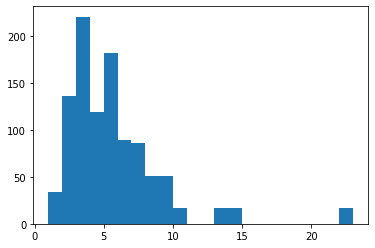

In [26]:
plt.hist((ls / 499).astype(int), bins=22)